# 테슬라 주가 예측을 위한 VAR 모델 구현

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


✅ 최적의 차수 (p): 5
📌 Test MSE: 396.1479


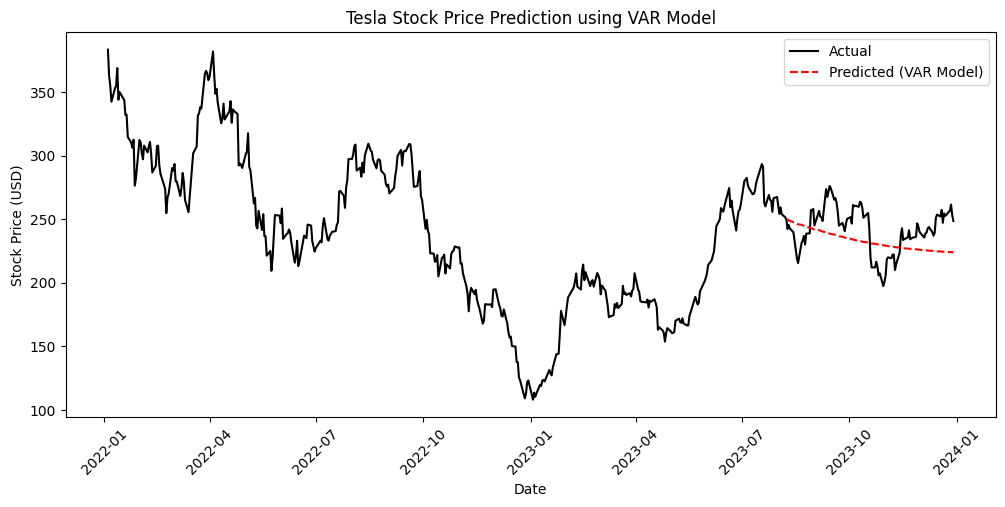

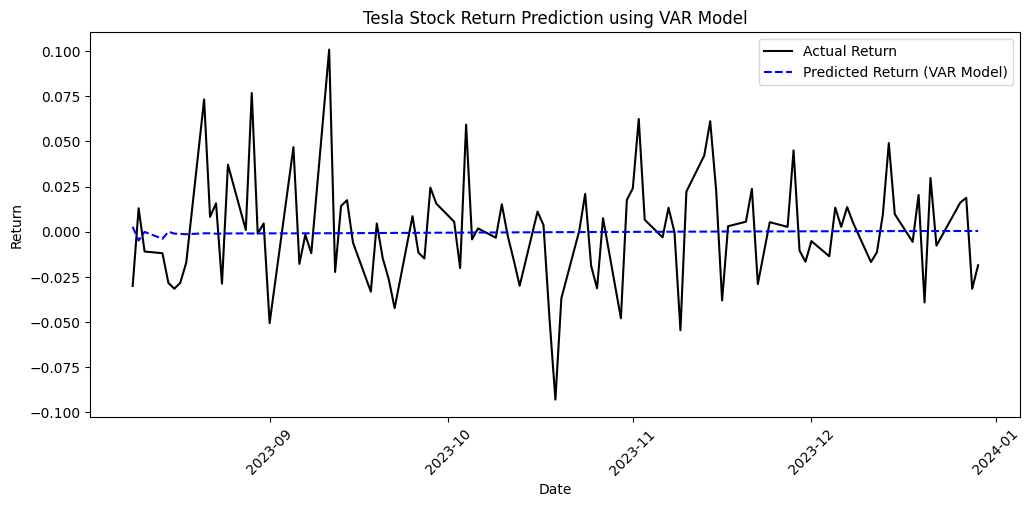

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error

# ✅ 1️⃣ 테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)
df = yf.download("TSLA", start="2022-01-01", end="2024-01-01")

# ✅ 2️⃣ 데이터 전처리 및 Feature 생성
df = df.reset_index()
df["Return"] = df["Close"].pct_change()  # 수익률 계산
df["Log_Close"] = np.log(df["Close"])  # 로그 변환 종가
df["Log_Volume"] = np.log(df["Volume"])  # 로그 변환 거래량
df = df.dropna()  # 결측값 제거

# ✅ 3️⃣ 변수 선택 (VAR 모델 입력 변수)
data = df[["Date", "Log_Close", "Log_Volume", "Return"]].set_index("Date")

# ✅ 4️⃣ 학습 및 테스트 데이터 분할 (80% 학습, 20% 테스트)
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size].copy(), data.iloc[train_size:].copy()

# ✅ 5️⃣ 최적의 VAR 차수(p) 선택 (AIC 기반)
lag_selection = VAR(train)
lag_results = lag_selection.select_order(maxlags=10)
best_lag = lag_results.aic  # AIC 최소값을 갖는 차수 선택
print(f"✅ 최적의 차수 (p): {best_lag}")

# ✅ 6️⃣ VAR 모델 학습
model = VAR(train)
model_fit = model.fit(best_lag)

# ✅ 7️⃣ 예측 수행 (테스트 데이터 크기만큼 예측)
test_pred = model_fit.forecast(train.values[-best_lag:], steps=len(test))

# ✅ 8️⃣ 예측된 결과를 데이터프레임으로 변환
test_pred_df = pd.DataFrame(test_pred, index=test.index, columns=["Log_Close_Pred", "Log_Volume_Pred", "Return_Pred"])

# ✅ 9️⃣ 원래의 `Date` 컬럼을 유지
test_pred_df["Date"] = test.index
test_pred_df["Close_Pred"] = np.exp(test_pred_df["Log_Close_Pred"])  # 로그 변환 해제

# ✅ 🔟 성능 평가 (MSE)
test_mse = mean_squared_error(np.exp(test["Log_Close"]), test_pred_df["Close_Pred"])
print(f"📌 Test MSE: {test_mse:.4f}")

# ✅ 11️⃣ 결과 시각화 (실제 vs 예측 종가)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Close"], label="Actual", color="black")
plt.plot(test_pred_df["Date"], test_pred_df["Close_Pred"], label="Predicted (VAR Model)", linestyle="--", color="red")
plt.title("Tesla Stock Price Prediction using VAR Model")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# ✅ 12️⃣ 수익률 예측 시각화
plt.figure(figsize=(12, 5))
plt.plot(test_pred_df["Date"], test["Return"], label="Actual Return", color="black")
plt.plot(test_pred_df["Date"], test_pred_df["Return_Pred"], label="Predicted Return (VAR Model)", linestyle="--", color="blue")
plt.title("Tesla Stock Return Prediction using VAR Model")
plt.xlabel("Date")
plt.ylabel("Return")
plt.xticks(rotation=45)
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


✅ 최적의 차수 (p): 5
Likely due to insufficient data variation. Skipping...
Likely due to insufficient data variation. Skipping...
Likely due to insufficient data variation. Skipping...
Likely due to insufficient data variation. Skipping...
Likely due to insufficient data variation. Skipping...
Likely due to insufficient data variation. Skipping...
Likely due to insufficient data variation. Skipping...
Likely due to insufficient data variation. Skipping...
Likely due to insufficient data variation. Skipping...
Likely due to insufficient data variation. Skipping...
Likely due to insufficient data variation. Skipping...
Likely due to insufficient data variation. Skipping...
Likely due to insufficient data variation. Skipping...
Likely due to insufficient data variation. Skipping...
Likely due to insufficient data variation. Skipping...
Likely due to insufficient data variation. Skipping...
Likely due to insufficient data variation. Skipping...
Likely due to insufficient data variation. Skippi

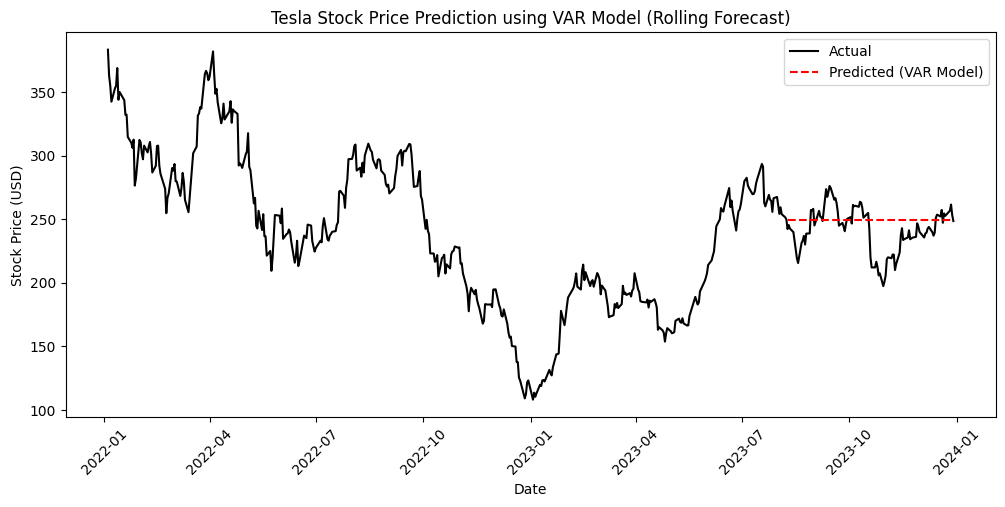

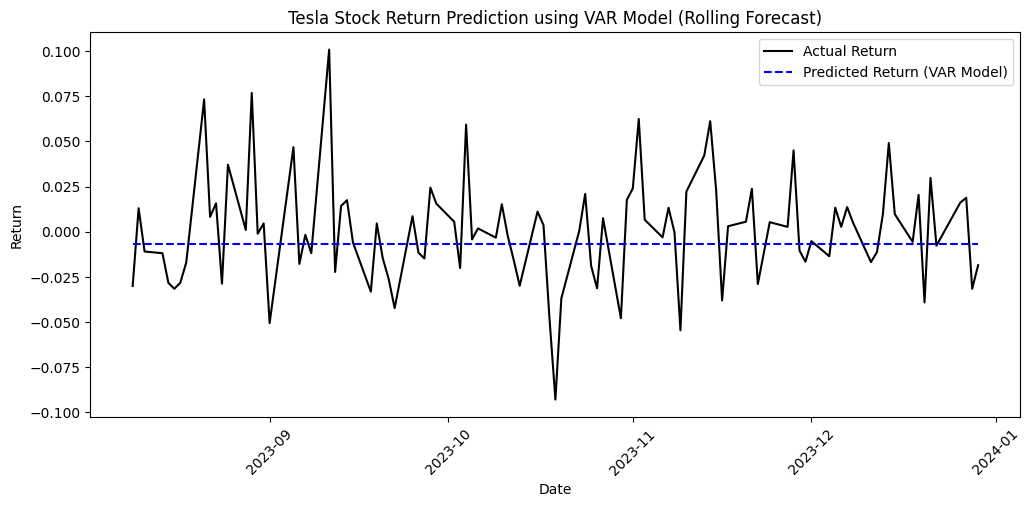

In [18]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error

# ✅ 1️⃣ 테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)
df = yf.download("TSLA", start="2022-01-01", end="2024-01-01")

# ✅ 2️⃣ 데이터 전처리 및 Feature 생성
df = df.reset_index()
df["Date"] = pd.to_datetime(df["Date"])  # 날짜 변환
df["Return"] = df["Close"].pct_change()  # 수익률 계산
df["Log_Close"] = np.log(df["Close"].replace(0, np.nan))  # 0 값 방지
df["Log_Volume"] = np.log(df["Volume"].replace(0, np.nan))  # 0 값 방지
df = df.dropna().reset_index(drop=True)  # 결측치 제거 및 인덱스 리셋

# ✅ 3️⃣ 변수 선택 (VAR 모델 입력 변수)
data = df[["Date", "Log_Close", "Log_Volume", "Return"]].set_index("Date")

# ✅ 4️⃣ 학습 및 테스트 데이터 분할 (80% 학습, 20% 테스트)
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size].copy(), data.iloc[train_size:].copy()

# ✅ 4️⃣-1 결측치 및 무한대 값 제거
train = train.dropna()
train = train[~train.isin([np.inf, -np.inf]).any(axis=1)]
test = test.dropna()
test = test[~test.isin([np.inf, -np.inf]).any(axis=1)]

# ✅ 5️⃣ 최적의 VAR 차수(p) 선택 (AIC 기준)
lag_selection = VAR(train)
lag_results = lag_selection.select_order(maxlags=10)
best_lag = lag_results.aic  # AIC 최소값을 갖는 차수 선택
best_lag = max(best_lag, 1)  # ✅ 최소 1 이상 유지
print(f"✅ 최적의 차수 (p): {best_lag}")

# ✅ 6️⃣ 롤링 VAR 예측 (One-step Rolling Forecast)
rolling_predictions = []
history = train.values.tolist()  # Use the entire train data as initial history

for t in range(len(test)):
    # Create history_df from the last 'best_lag' data points in history
    history_df = pd.DataFrame(history[-best_lag:], columns=train.columns)

    # ✅ Check if history_df has enough data points and non-constant columns
    if len(history_df) < best_lag or history_df.empty or history_df.nunique().min() <= 1:
        print(f"Warning: Insufficient or constant data for rolling forecast at step {t}. Skipping...")
        # If history_df has issues, use the previous prediction (if available) or the last actual value
        if rolling_predictions:
            rolling_predictions.append(rolling_predictions[-1])  # Use the previous prediction
        else:
            rolling_predictions.append(history[-1])  # Use the last actual value
        history.append(test.iloc[t].values.tolist())  # Update history for the next step
        continue  # Skip to the next iteration

    # ✅ 6️⃣-4 모델 학습 및 예측
    model = VAR(history_df)

    # Check if the data has enough variation for VAR model fitting:
    if np.any(np.isinf(history_df.values)) or np.any(np.isnan(history_df.values)) or np.all(history_df.values == history_df.values[0, :], axis=0).any():
        print(f"Warning: Data issues (inf, nan, or constant values) at step {t}. Skipping...")
        if rolling_predictions:
            rolling_predictions.append(rolling_predictions[-1])
        else:
            rolling_predictions.append(history[-1])
        history.append(test.iloc[t].values.tolist())
        continue

    try:
        model_fit = model.fit(best_lag)
    except ValueError as e:
        print(f"Warning: ValueError encountered during model fitting at step {t}: {e}")
        print("Likely due to insufficient data variation. Skipping...")
        if rolling_predictions:
            rolling_predictions.append(rolling_predictions[-1])
        else:
            rolling_predictions.append(history[-1])
        history.append(test.iloc[t].values.tolist())
        continue

    # ✅ 6️⃣-5 한 스텝 예측 수행
    pred = model_fit.forecast(history_df.values[-best_lag:], steps=1)  # Forecast using history_df
    rolling_predictions.append(pred[0])

    # ✅ 6️⃣-6 실제값 추가하여 롤링 업데이트
    history.append(test.iloc[t].values.tolist())  # Update history for the next step





# ✅ 7️⃣ 예측된 결과를 데이터프레임으로 변환
rolling_predictions = np.array(rolling_predictions)
test_pred_df = pd.DataFrame(rolling_predictions, index=test.index[:len(rolling_predictions)], columns=["Log_Close_Pred", "Log_Volume_Pred", "Return_Pred"])

# ✅ 8️⃣ 로그 변환 해제
test_pred_df["Close_Pred"] = np.exp(test_pred_df["Log_Close_Pred"])

# ✅ 9️⃣ 성능 평가 (MSE)
test_mse = mean_squared_error(np.exp(test["Log_Close"][:len(test_pred_df)]), test_pred_df["Close_Pred"])
print(f"📌 Test MSE: {test_mse:.4f}")

# ✅ 10️⃣ 결과 시각화 (실제 vs 예측 종가)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Close"], label="Actual", color="black")
plt.plot(test_pred_df.index, test_pred_df["Close_Pred"], label="Predicted (VAR Model)", linestyle="--", color="red")
plt.title("Tesla Stock Price Prediction using VAR Model (Rolling Forecast)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# ✅ 11️⃣ 수익률 예측 시각화
plt.figure(figsize=(12, 5))
plt.plot(test_pred_df.index, test["Return"][:len(test_pred_df)], label="Actual Return", color="black")
plt.plot(test_pred_df.index, test_pred_df["Return_Pred"], label="Predicted Return (VAR Model)", linestyle="--", color="blue")
plt.title("Tesla Stock Return Prediction using VAR Model (Rolling Forecast)")
plt.xlabel("Date")
plt.ylabel("Return")
plt.xticks(rotation=45)
plt.legend()
plt.show()


# ✅ 📌 VAR 모델에서 롤링 예측 적용 코드

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


✅ 최적의 차수 (p): 5
⚠️ Warning: ValueError during model fitting at step 0: zero-size array to reduction operation maximum which has no identity
⚠️ Warning: ValueError during model fitting at step 1: zero-size array to reduction operation maximum which has no identity
⚠️ Warning: ValueError during model fitting at step 2: zero-size array to reduction operation maximum which has no identity
⚠️ Warning: ValueError during model fitting at step 3: zero-size array to reduction operation maximum which has no identity
⚠️ Warning: ValueError during model fitting at step 4: zero-size array to reduction operation maximum which has no identity
⚠️ Warning: ValueError during model fitting at step 5: zero-size array to reduction operation maximum which has no identity
⚠️ Warning: ValueError during model fitting at step 6: zero-size array to reduction operation maximum which has no identity
⚠️ Warning: ValueError during model fitting at step 7: zero-size array to reduction operation maximum which has no i

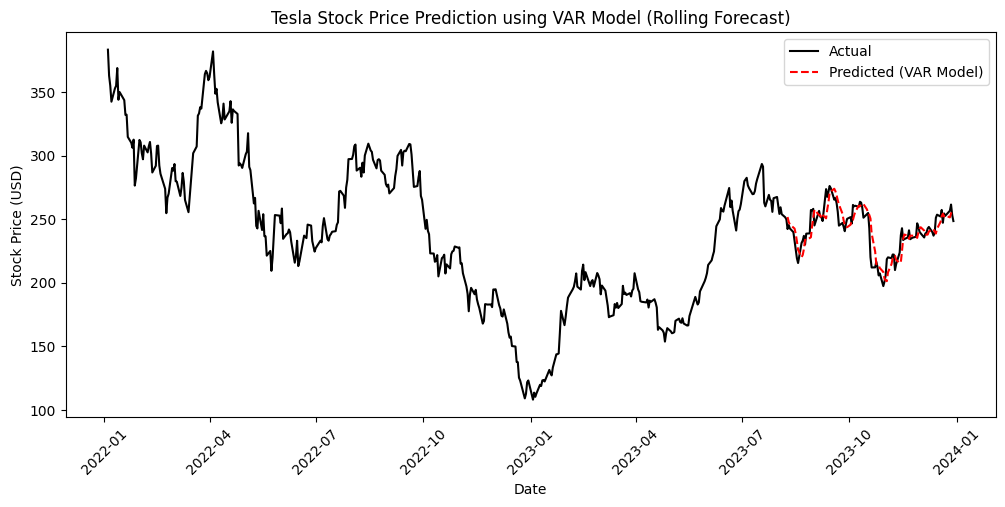

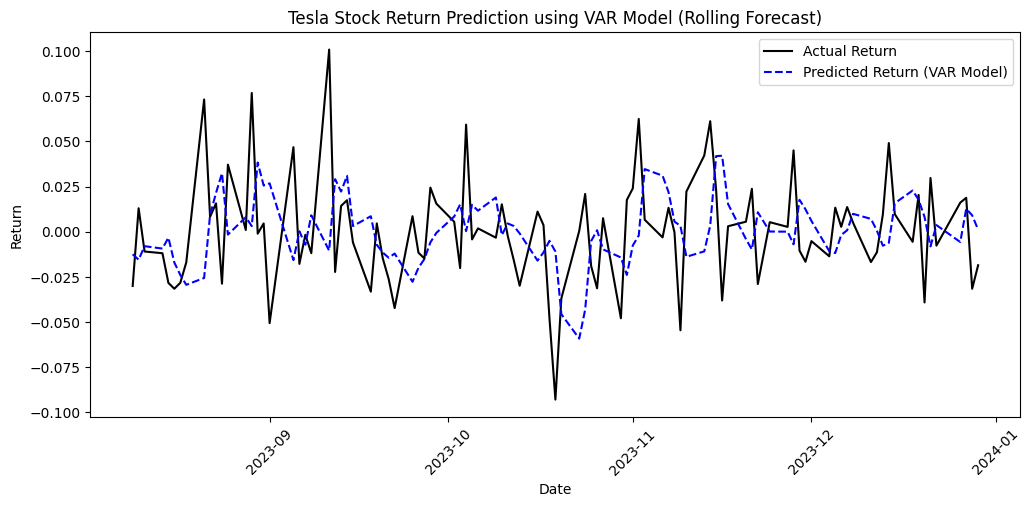

In [20]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error

# ✅ 1️⃣ 테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)
df = yf.download("TSLA", start="2022-01-01", end="2024-01-01")

# ✅ 2️⃣ 데이터 전처리 및 Feature 생성
df = df.reset_index()
df["Date"] = pd.to_datetime(df["Date"])  # 날짜 변환
df["Return"] = df["Close"].pct_change()  # 수익률 계산
df["Log_Close"] = np.log(df["Close"].replace(0, np.nan))  # 로그 변환 종가
df["Log_Volume"] = np.log(df["Volume"].replace(0, np.nan))  # 로그 변환 거래량
df = df.dropna().reset_index(drop=True)  # 결측값 제거 및 인덱스 리셋

# ✅ 3️⃣ 변수 선택 (VAR 모델 입력 변수)
data = df[["Date", "Log_Close", "Log_Volume", "Return"]].set_index("Date")

# ✅ 4️⃣ 학습 및 테스트 데이터 분할 (80% 학습, 20% 테스트)
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size].copy(), data.iloc[train_size:].copy()

# ✅ 4️⃣-1 결측치 및 무한대 값 제거
train = train.dropna()
train = train[~train.isin([np.inf, -np.inf]).any(axis=1)]
test = test.dropna()
test = test[~test.isin([np.inf, -np.inf]).any(axis=1)]

# ✅ 5️⃣ 최적의 VAR 차수(p) 선택 (AIC 기준)
lag_selection = VAR(train)
lag_results = lag_selection.select_order(maxlags=10)
best_lag = lag_results.aic  # AIC 최소값을 갖는 차수 선택
best_lag = max(best_lag, 1)  # ✅ 최소 1 이상 유지
print(f"✅ 최적의 차수 (p): {best_lag}")

# ✅ 6️⃣ 롤링 VAR 예측 (One-step Rolling Forecast)
rolling_predictions = []
history = train.values.tolist()  # Use the entire train data as initial history

for t in range(len(test)):
    # Create history_df from the last 'best_lag' data points in history
    history_df = pd.DataFrame(history[-best_lag:], columns=train.columns)

    # ✅ 데이터 문제 감지 및 해결
    if len(history_df) < best_lag or history_df.empty or history_df.nunique().min() <= 1:
        print(f"⚠️ Warning: Insufficient or constant data at step {t}. Adjusting...")

        # 최근 3일치 평균으로 대체
        avg_values = np.mean(history[-3:], axis=0).tolist() if len(history) >= 3 else history[-1]
        rolling_predictions.append(avg_values)  # 최근 평균값 사용

        # 실제 데이터를 추가하여 업데이트
        history.append(test.iloc[t].values.tolist())
        continue  # Skip to the next iteration

    # ✅ 6️⃣-4 모델 학습 및 예측
    model = VAR(history_df)

    # 데이터가 모두 동일한 경우 모델 학습 방지
    if np.all(history_df.values == history_df.values[0, :], axis=0).any():
        print(f"⚠️ Warning: No variation in data at step {t}. Adjusting...")
        avg_values = np.mean(history[-3:], axis=0).tolist()
        rolling_predictions.append(avg_values)
        history.append(test.iloc[t].values.tolist())
        continue

    try:
        model_fit = model.fit(best_lag)
    except ValueError as e:
        print(f"⚠️ Warning: ValueError during model fitting at step {t}: {e}")
        avg_values = np.mean(history[-3:], axis=0).tolist()
        rolling_predictions.append(avg_values)
        history.append(test.iloc[t].values.tolist())
        continue

    # ✅ 6️⃣-5 한 스텝 예측 수행
    pred = model_fit.forecast(history_df.values[-best_lag:], steps=1)
    rolling_predictions.append(pred[0])

    # ✅ 6️⃣-6 예측값을 history에 추가하여 업데이트
    history.append(pred[0].tolist())  # 이전 코드와 다르게 **예측값을 추가**

# ✅ 7️⃣ 예측된 결과를 데이터프레임으로 변환
rolling_predictions = np.array(rolling_predictions)
test_pred_df = pd.DataFrame(rolling_predictions, index=test.index[:len(rolling_predictions)], columns=["Log_Close_Pred", "Log_Volume_Pred", "Return_Pred"])

# ✅ 8️⃣ 로그 변환 해제
test_pred_df["Close_Pred"] = np.exp(test_pred_df["Log_Close_Pred"])

# ✅ 9️⃣ 성능 평가 (MSE)
test_mse = mean_squared_error(np.exp(test["Log_Close"][:len(test_pred_df)]), test_pred_df["Close_Pred"])
print(f"📌 Test MSE: {test_mse:.4f}")

# ✅ 10️⃣ 결과 시각화 (실제 vs 예측 종가)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Close"], label="Actual", color="black")
plt.plot(test_pred_df.index, test_pred_df["Close_Pred"], label="Predicted (VAR Model)", linestyle="--", color="red")
plt.title("Tesla Stock Price Prediction using VAR Model (Rolling Forecast)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()


# ✅ 11️⃣ 수익률 예측 시각화
plt.figure(figsize=(12, 5))
plt.plot(test_pred_df.index, test["Return"][:len(test_pred_df)], label="Actual Return", color="black")
plt.plot(test_pred_df.index, test_pred_df["Return_Pred"], label="Predicted Return (VAR Model)", linestyle="--", color="blue")
plt.title("Tesla Stock Return Prediction using VAR Model (Rolling Forecast)")
plt.xlabel("Date")
plt.ylabel("Return")
plt.xticks(rotation=45)
plt.legend()
plt.show()